<a href="https://colab.research.google.com/github/MehelaMariyo/Elastic-Net-Regression-Model-on-Crime-data/blob/main/ConvertToStationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
df = pd.read_csv('DataF.csv')
df.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate
0,1980,7.254323,0.670,13.40,5.846027,0.00,0.0,65.253,238.297640,119.281517,15.69
1,1981,8.263114,0.560,5.29,5.699525,0.04,0.0,65.253,242.368330,122.501320,15.69
2,1982,9.325140,0.778,4.38,4.141496,0.01,0.0,65.253,246.192840,122.830040,15.69
3,1983,10.563145,0.990,17.50,4.813991,0.05,0.0,65.253,249.696093,122.421852,15.69
4,1984,9.632510,0.944,3.34,5.099147,0.00,0.0,65.253,253.110780,122.966499,15.69


In [5]:
 def test_stationarity(dataFrame, variable):
      dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
      dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()
      sns.lineplot(data=dataFrame,x=dataFrame.index,y=dataFrame[variable])
      sns.lineplot(data=dataFrame,x=dataFrame.index,y=dataFrame.rollMean)
      sns.lineplot(data=dataFrame,x=dataFrame.index,y=dataFrame.rollStd)

      from statsmodels.tsa.stattools import adfuller
      adTest = adfuller(dataFrame[variable], autolag="AIC",)
      stats = pd.Series(adTest[0:4], index=["Test Statistic","p-value","#lags used","number of observation used"])
      print(stats)

      for key, value in adTest[4].items():
          print("significance level",key,":",value)

Test Statistic                -0.900124
p-value                        0.787932
#lags used                     0.000000
number of observation used    43.000000
dtype: float64
significance level 1% : -3.5925042342183704
significance level 5% : -2.931549768951162
significance level 10% : -2.60406594375338


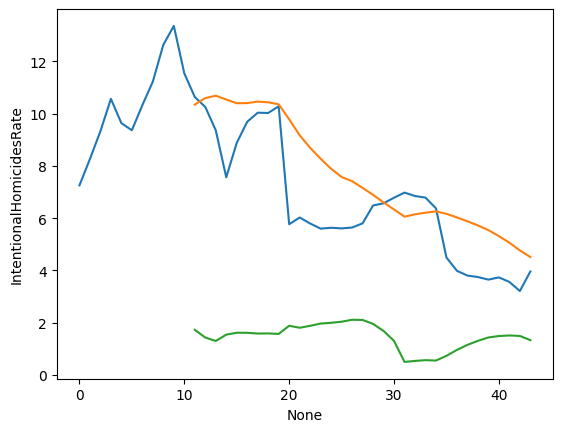

In [6]:
test_stationarity(df,'IntentionalHomicidesRate')

Figure(640x480)


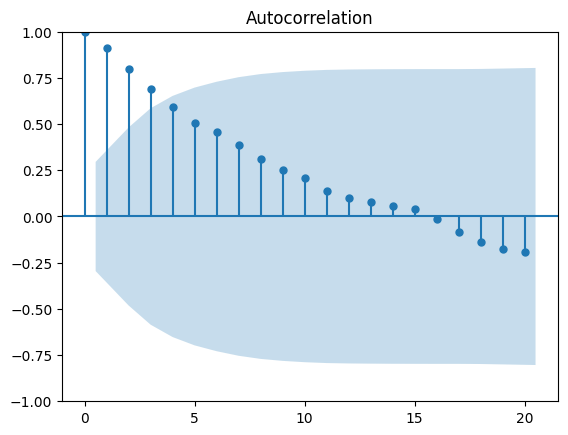

In [19]:
print(plot_acf(df['IntentionalHomicidesRate'], lags=20))

Figure(640x480)


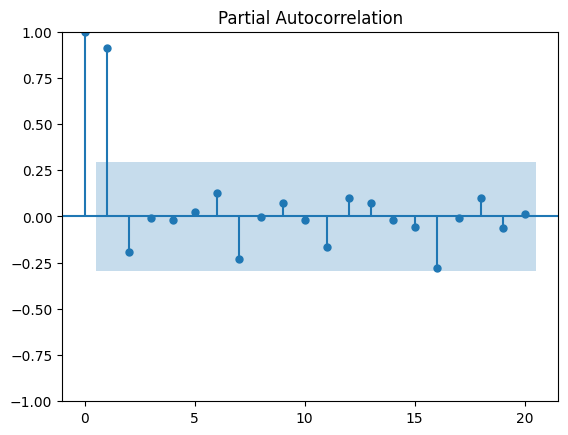

In [21]:
print(plot_pacf(df['IntentionalHomicidesRate'], lags=20))

In [110]:
df2 = df.copy()
df2.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate,rollMean,rollStd
0,1980,7.254323,0.670,13.40,5.846027,0.00,0.0,65.253,238.297640,119.281517,15.69,NaN,NaN
1,1981,8.263114,0.560,5.29,5.699525,0.04,0.0,65.253,242.368330,122.501320,15.69,NaN,NaN
2,1982,9.325140,0.778,4.38,4.141496,0.01,0.0,65.253,246.192840,122.830040,15.69,NaN,NaN
3,1983,10.563145,0.990,17.50,4.813991,0.05,0.0,65.253,249.696093,122.421852,15.69,NaN,NaN
4,1984,9.632510,0.944,3.34,5.099147,0.00,0.0,65.253,253.110780,122.966499,15.69,NaN,NaN


<ipython-input-5-32e5533896c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
<ipython-input-5-32e5533896c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()


Test Statistic                -5.602897
p-value                        0.000001
#lags used                     0.000000
number of observation used    32.000000
dtype: float64
significance level 1% : -3.653519805908203
significance level 5% : -2.9572185644531253
significance level 10% : -2.6175881640625


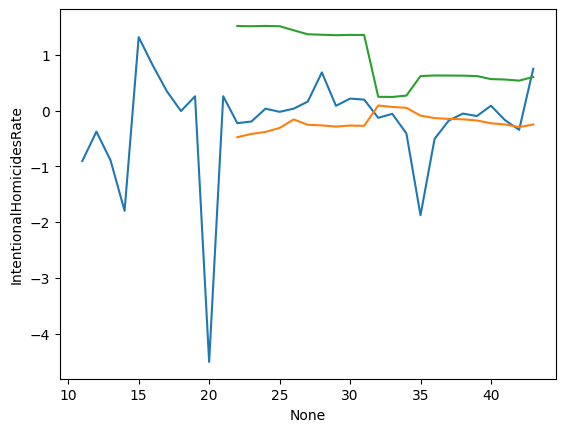

In [61]:
df2['IntentionalHomicidesRate'] = df2['IntentionalHomicidesRate'].diff(periods=1).dropna()
test_stationarity(df2.dropna(),'IntentionalHomicidesRate')

Figure(640x480)


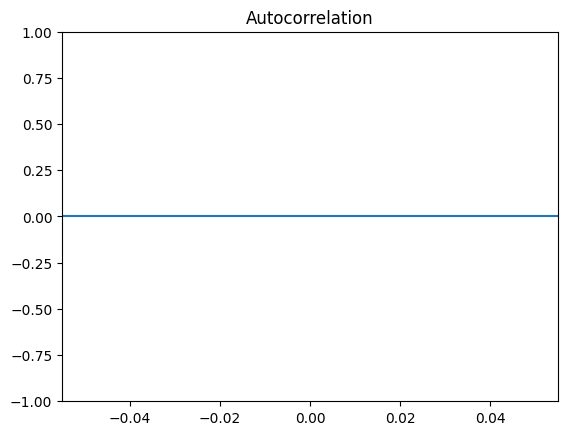

In [62]:
print(plot_acf(df2['IntentionalHomicidesRate'], lags=20))

Figure(640x480)


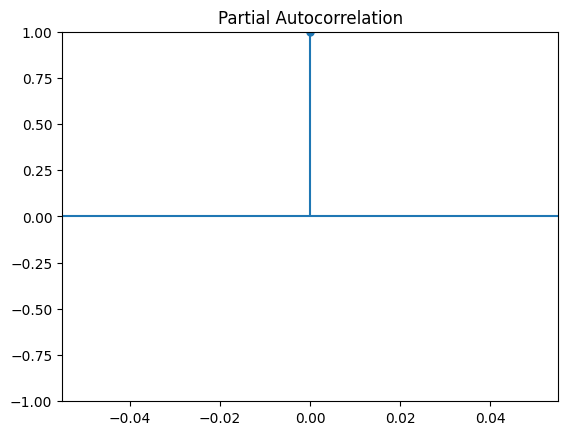

In [63]:
print(plot_pacf(df2['IntentionalHomicidesRate'], lags=20))

Test Statistic                -0.300721
p-value                        0.925402
#lags used                     1.000000
number of observation used    42.000000
dtype: float64
significance level 1% : -3.596635636000432
significance level 5% : -2.933297331821618
significance level 10% : -2.6049909750566895


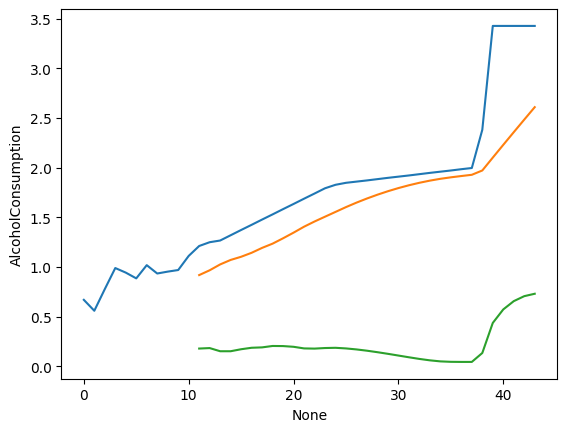

In [64]:
test_stationarity(df,'AlcoholConsumption')

<ipython-input-5-32e5533896c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
<ipython-input-5-32e5533896c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()


Test Statistic                -4.225430
p-value                        0.000597
#lags used                     0.000000
number of observation used    32.000000
dtype: float64
significance level 1% : -3.653519805908203
significance level 5% : -2.9572185644531253
significance level 10% : -2.6175881640625


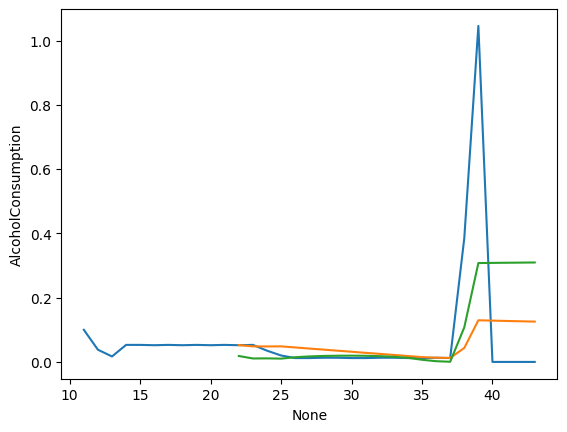

In [65]:
df2['AlcoholConsumption'] = df2['AlcoholConsumption'].diff(periods=1).dropna()
test_stationarity(df2.dropna(),'AlcoholConsumption')

Test Statistic                 0.768800
p-value                        0.991115
#lags used                     6.000000
number of observation used    37.000000
dtype: float64
significance level 1% : -3.6209175221605827
significance level 5% : -2.9435394610388332
significance level 10% : -2.6104002410518627


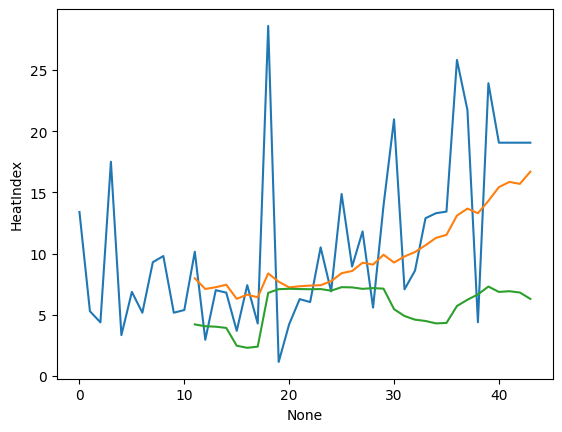

In [66]:
test_stationarity(df,'HeatIndex')

<ipython-input-5-32e5533896c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
<ipython-input-5-32e5533896c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()


Test Statistic                -3.103500
p-value                        0.026295
#lags used                     8.000000
number of observation used    24.000000
dtype: float64
significance level 1% : -3.7377092158564813
significance level 5% : -2.9922162731481485
significance level 10% : -2.635746736111111


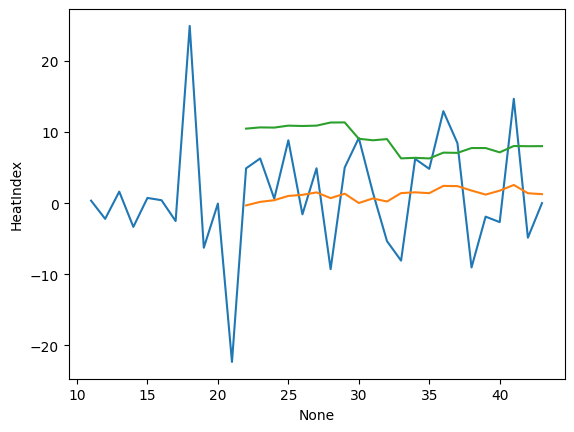

In [70]:
df2['HeatIndex'] = df2['HeatIndex'].diff(periods=3).dropna()
test_stationarity(df2.dropna(),'HeatIndex')

Test Statistic                 0.272273
p-value                        0.976036
#lags used                     2.000000
number of observation used    41.000000
dtype: float64
significance level 1% : -3.60098336718852
significance level 5% : -2.9351348158036012
significance level 10% : -2.6059629803688282


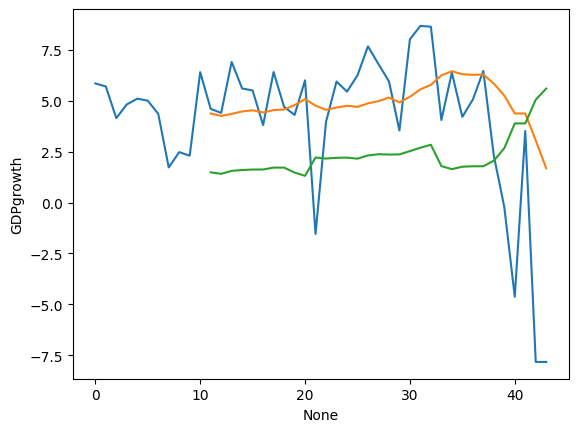

In [9]:
test_stationarity(df,'GDPgrowth')

<ipython-input-5-32e5533896c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
<ipython-input-5-32e5533896c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()


Test Statistic               -9.188774e+00
p-value                       2.151474e-15
#lags used                    0.000000e+00
number of observation used    3.200000e+01
dtype: float64
significance level 1% : -3.653519805908203
significance level 5% : -2.9572185644531253
significance level 10% : -2.6175881640625


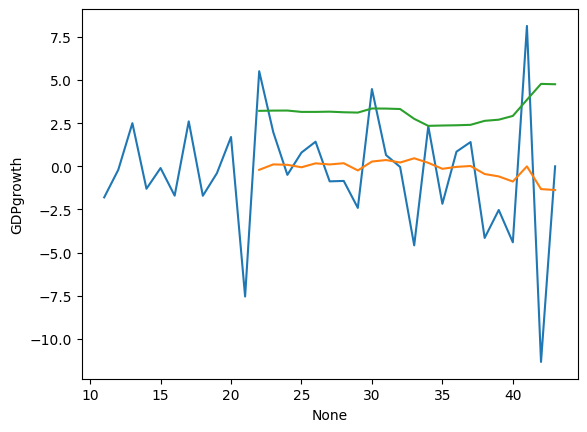

In [71]:
df2['GDPgrowth'] = df2['GDPgrowth'].diff(periods=1).dropna()
test_stationarity(df2.dropna(),'GDPgrowth')

Test Statistic               -6.579895e+00
p-value                       7.560375e-09
#lags used                    0.000000e+00
number of observation used    4.300000e+01
dtype: float64
significance level 1% : -3.5925042342183704
significance level 5% : -2.931549768951162
significance level 10% : -2.60406594375338


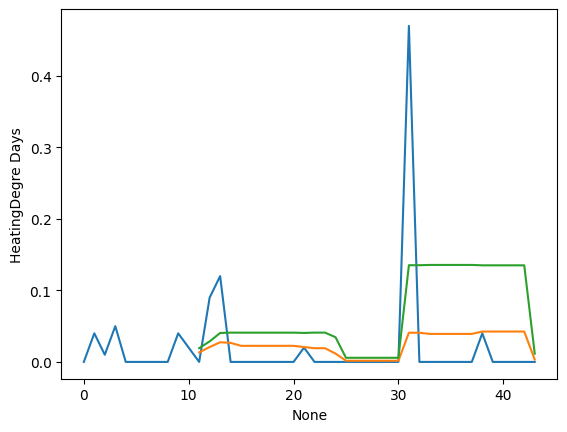

In [11]:
test_stationarity(df,'HeatingDegre Days')

<ipython-input-5-32e5533896c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
<ipython-input-5-32e5533896c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()


Test Statistic               -6.470668e+00
p-value                       1.369733e-08
#lags used                    1.000000e+00
number of observation used    3.100000e+01
dtype: float64
significance level 1% : -3.661428725118324
significance level 5% : -2.960525341210433
significance level 10% : -2.6193188033298647


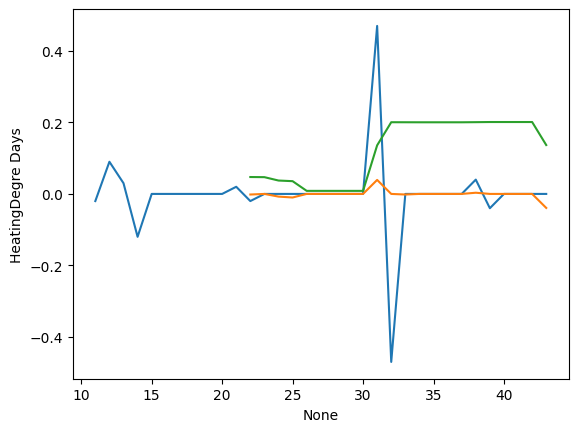

In [72]:
df2['HeatingDegre Days'] = df2['HeatingDegre Days'].diff(periods=1).dropna()
test_stationarity(df2.dropna(),'HeatingDegre Days')

Test Statistic                 4.22874
p-value                        1.00000
#lags used                     9.00000
number of observation used    34.00000
dtype: float64
significance level 1% : -3.639224104416853
significance level 5% : -2.9512301791166293
significance level 10% : -2.614446989619377


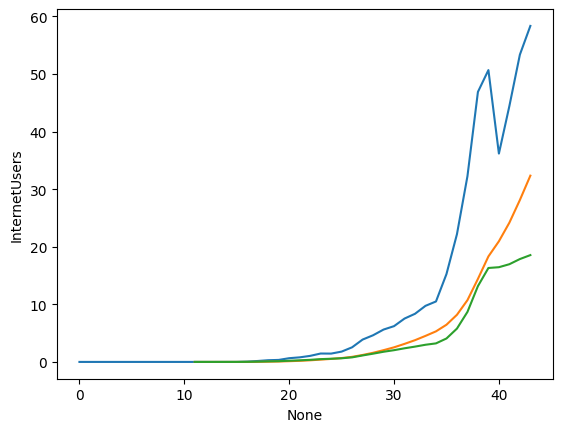

In [12]:
test_stationarity(df,'InternetUsers')

In [131]:
df3 = df.copy()
df3.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate,rollMean,rollStd
0,1980,7.254323,0.670,13.40,5.846027,0.00,0.0,65.253,238.297640,119.281517,15.69,NaN,NaN
1,1981,8.263114,0.560,5.29,5.699525,0.04,0.0,65.253,242.368330,122.501320,15.69,NaN,NaN
2,1982,9.325140,0.778,4.38,4.141496,0.01,0.0,65.253,246.192840,122.830040,15.69,NaN,NaN
3,1983,10.563145,0.990,17.50,4.813991,0.05,0.0,65.253,249.696093,122.421852,15.69,NaN,NaN
4,1984,9.632510,0.944,3.34,5.099147,0.00,0.0,65.253,253.110780,122.966499,15.69,NaN,NaN


<ipython-input-5-32e5533896c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
<ipython-input-5-32e5533896c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()


Test Statistic                 2.207626
p-value                        0.998889
#lags used                     7.000000
number of observation used    25.000000
dtype: float64
significance level 1% : -3.7238633119999998
significance level 5% : -2.98648896
significance level 10% : -2.6328004


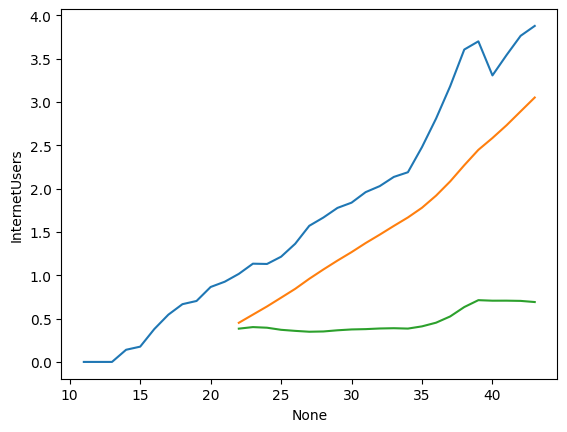

In [132]:
df3['InternetUsers'] = np.cbrt(df3['InternetUsers'])
test_stationarity(df3.dropna(),'InternetUsers')

Test Statistic                -1.312855
p-value                        0.623271
#lags used                     0.000000
number of observation used    43.000000
dtype: float64
significance level 1% : -3.5925042342183704
significance level 5% : -2.931549768951162
significance level 10% : -2.60406594375338


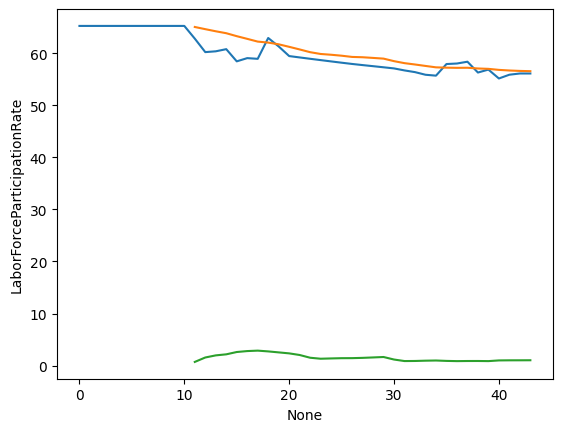

In [13]:
test_stationarity(df,'LaborForceParticipationRate')

<ipython-input-5-32e5533896c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
<ipython-input-5-32e5533896c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()


Test Statistic               -5.798983e+00
p-value                       4.679069e-07
#lags used                    4.000000e+00
number of observation used    2.800000e+01
dtype: float64
significance level 1% : -3.6889256286443146
significance level 5% : -2.9719894897959187
significance level 10% : -2.6252957653061224


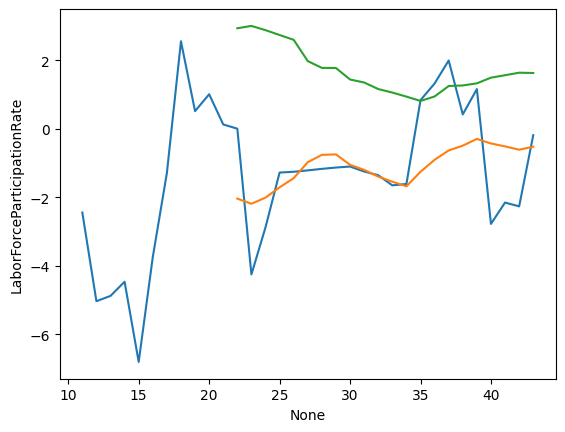

In [107]:
df2['LaborForceParticipationRate'] = df2['LaborForceParticipationRate'].diff(periods=5).dropna()
test_stationarity(df2.dropna(),'LaborForceParticipationRate')

Test Statistic                -1.814539
p-value                        0.373268
#lags used                     8.000000
number of observation used    35.000000
dtype: float64
significance level 1% : -3.6327426647230316
significance level 5% : -2.9485102040816327
significance level 10% : -2.6130173469387756


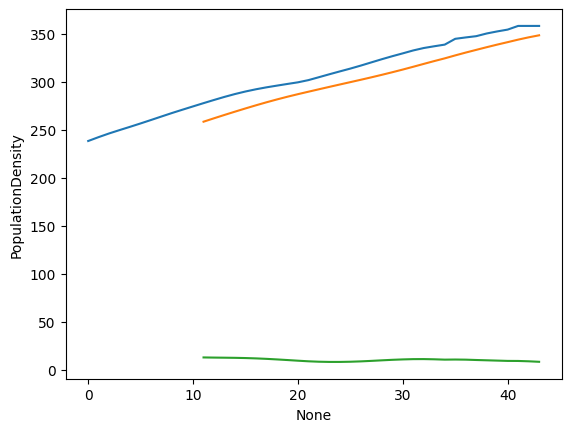

In [14]:
test_stationarity(df,'PopulationDensity')

<ipython-input-5-32e5533896c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
<ipython-input-5-32e5533896c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()


Test Statistic                -3.051512
p-value                        0.030356
#lags used                     9.000000
number of observation used    23.000000
dtype: float64
significance level 1% : -3.7529275211638033
significance level 5% : -2.998499866852963
significance level 10% : -2.6389669754253307


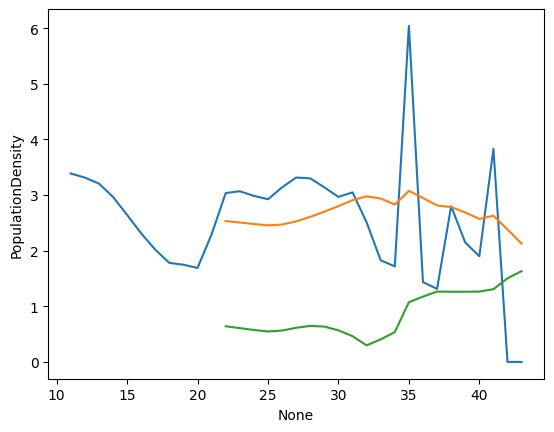

In [111]:
df2['PopulationDensity'] = df2['PopulationDensity'].diff(periods=1).dropna()
test_stationarity(df2.dropna(),'PopulationDensity')

Test Statistic                -1.465103
p-value                        0.550698
#lags used                     0.000000
number of observation used    43.000000
dtype: float64
significance level 1% : -3.5925042342183704
significance level 5% : -2.931549768951162
significance level 10% : -2.60406594375338


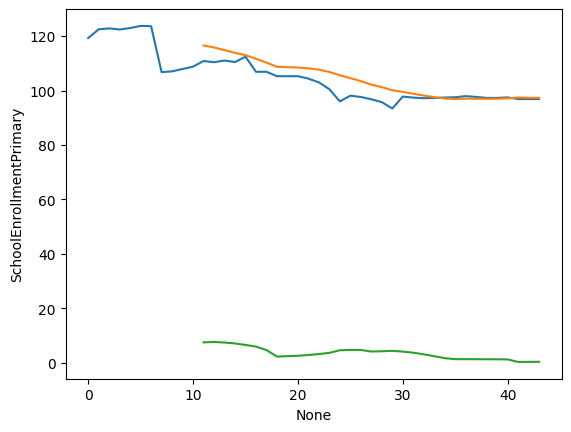

In [15]:
test_stationarity(df,'SchoolEnrollmentPrimary')

<ipython-input-5-32e5533896c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
<ipython-input-5-32e5533896c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()


Test Statistic               -7.048843e+00
p-value                       5.594572e-10
#lags used                    0.000000e+00
number of observation used    3.200000e+01
dtype: float64
significance level 1% : -3.653519805908203
significance level 5% : -2.9572185644531253
significance level 10% : -2.6175881640625


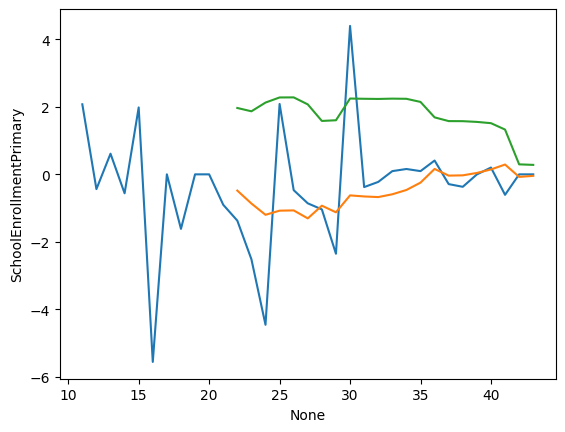

In [112]:
df2['SchoolEnrollmentPrimary'] = df2['SchoolEnrollmentPrimary'].diff(periods=1).dropna()
test_stationarity(df2.dropna(),'SchoolEnrollmentPrimary')

Test Statistic                -1.303989
p-value                        0.627345
#lags used                     0.000000
number of observation used    43.000000
dtype: float64
significance level 1% : -3.5925042342183704
significance level 5% : -2.931549768951162
significance level 10% : -2.60406594375338


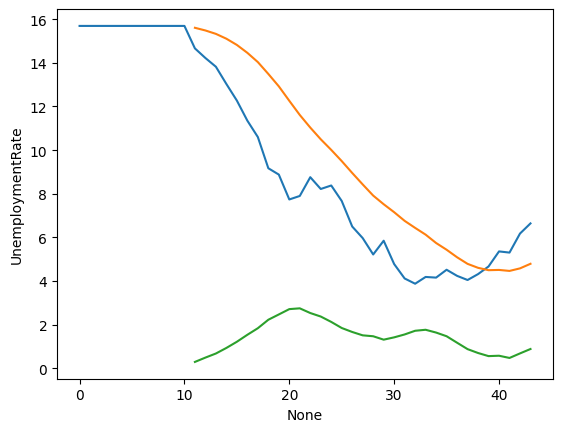

In [16]:
test_stationarity(df,'UnemploymentRate')

<ipython-input-5-32e5533896c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[variable].rolling(window=12).mean()
<ipython-input-5-32e5533896c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[variable].rolling(window=12).std()


Test Statistic                -4.016766
p-value                        0.001325
#lags used                     0.000000
number of observation used    32.000000
dtype: float64
significance level 1% : -3.653519805908203
significance level 5% : -2.9572185644531253
significance level 10% : -2.6175881640625


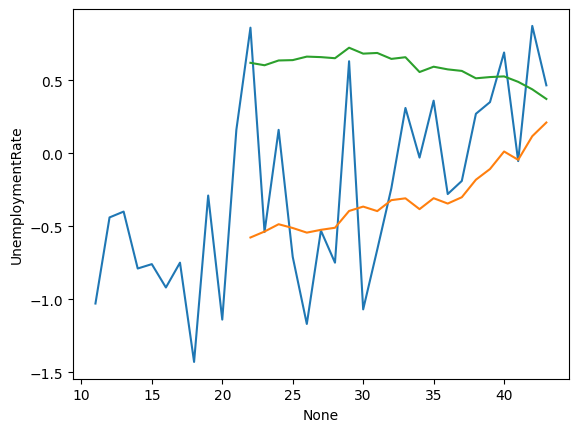

In [113]:
df2['UnemploymentRate'] = df2['UnemploymentRate'].diff(periods=1).dropna()
test_stationarity(df2.dropna(),'UnemploymentRate')

In [133]:
df2.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate,rollMean,rollStd
0,1980,7.254323,0.670,13.40,5.846027,0.00,0.0,65.253,NaN,NaN,NaN,NaN,NaN
1,1981,8.263114,0.560,5.29,5.699525,0.04,0.0,65.253,4.070690,3.219803,0.0,NaN,NaN
2,1982,9.325140,0.778,4.38,4.141496,0.01,0.0,65.253,3.824510,0.328720,0.0,NaN,NaN
3,1983,10.563145,0.990,17.50,4.813991,0.05,0.0,65.253,3.503253,-0.408188,0.0,NaN,NaN
4,1984,9.632510,0.944,3.34,5.099147,0.00,0.0,65.253,3.414687,0.544647,0.0,NaN,NaN
